# HK Travel: Forecasting with Google Trends

### Data is downloaded from Google Trends : www.google.com/trends
- Search term: Hong Kong
- US (Country), Jan 1, 2009 – Aug 31, 2014 (date), Travel (category), web search
- Data id named as “HK search.csv”

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

 # scikit-learn is designed for prediction
 # statsmodels is better suited for explanatiion

### 1. Use "HK visit" data. Split “Date” in the search data into year and month.


In [2]:
# Read data. Both Search data and Vistor data are monthly

df1 = pd.read_csv('HK search.csv')
df1.head()

,date,search
0,2009-01,82
1,2009-02,92
2,2009-03,87
3,2009-04,85
4,2009-05,81


- This code reads a CSV file named 'HK search.csv' into a pandas DataFrame (df1) and displays the first few rows of the DataFrame using the `head()` method.

In [3]:
# Split date into year and moth

df1['year'] = pd.to_numeric(df1.date.str.split('-').str[0])  # str[0]: 1st string
df1['month']= pd.to_numeric(df1.date.str.split('-').str[1])  # str[1]: 2nd string
df1.head()

,date,search,year,month
0,2009-01,82,2009,1
1,2009-02,92,2009,2
2,2009-03,87,2009,3
3,2009-04,85,2009,4
4,2009-05,81,2009,5


- `df1['year'] = pd.to_numeric(df1.date.str.split('-').str[0])`:
  - `df1['date']` accesses the 'date' column in the DataFrame.
  - `str.split('-')` splits each entry in the 'date' column using the hyphen ('-') as the delimiter.
  - `str[0]` accesses the first element (index 0) of each split string, which represents the year.
  - `pd.to_numeric(...)` converts the extracted values into numeric format (integers). This is necessary because year and month become objects(string) after split.
- `df1['month'] = pd.to_numeric(df1.date.str.split('-').str[1])`: Similar to the first line, this line extracts the 'month' component from the 'date' column.
  - `str[1]` accesses the second element (index 1) of each split string, representing the month.

### 2. Merge the search data with Hong Kong visitor data based on year and month.


In [4]:
#  Read data

df2 = pd.read_csv('HK visit.csv')  # monthly data
df2.head()

,visit,year,month
0,76682,2009,1
1,67687,2009,2
2,98750,2009,3
3,98067,2009,4
4,82771,2009,5


In [5]:
# Merge the two datasets and sort by year and month. Save the sorted result.

df = pd.merge(df1, df2, on=['year', 'month'], how='inner')  # inner: Keep common obs
df.sort_values(['year', 'month'], inplace=True)
 # inplace=True: impose operation to data
 # Alternative: df=df.sort_values(['year', 'month'])
df.head(100)

,date,search,year,month,visit
0,2009-01,82,2009,1,76682
1,2009-02,92,2009,2,67687
2,2009-03,87,2009,3,98750
3,2009-04,85,2009,4,98067
4,2009-05,81,2009,5,82771
...,...,...,...,...,...
63,2014-04,68,2014,4,101917
64,2014-05,72,2014,5,96068
65,2014-06,71,2014,6,98659
66,2014-07,73,2014,7,92397


- `df = pd.merge(df1, df2, on=['year', 'month'], how='inner')`: This line performs a database-style join between two DataFrames, df1 and df2.
    - `on=['year', 'month']` specifies that the merge is based on the 'year' and 'month' columns.
    - `how='inner'` specifies that an inner join should be used. This means that only rows with matching 'year' and 'month' values in both DataFrames will be included in the resulting DataFrame 'df'.
    - (options): suffixes=(), validate()
- `df.sort_values(['year', 'month'], inplace=True)`: After the merge operation, this line sorts the DataFrame 'df' based on the 'year' and 'month' columns in ascending order.
    - `['year', 'month']` specifies the sort order, where the DataFrame is first sorted by 'year' and then, within each 'year', by 'month' in ascending order.
    - `inplace=True` indicates that the sorting is performed on the DataFrame 'df' itself, and it doesn't create a new DataFrame.

### 3. Create the following lagged variables.
- L1Visit, L12Visit, L1Search, L12Search (L1: Lagged by one month, L12: Lagged by 12 months)

In [6]:
# Create lagged variables

df['L1visit'] = df.visit.shift(1)
df['L12visit'] = df.visit.shift(12)
df['L1search'] = df.search.shift(1)
df['L12search'] = df.search.shift(12)
df.head(15)

,date,search,year,month,visit,L1visit,L12visit,L1search,L12search
0,2009-01,82,2009,1,76682,NaN,NaN,NaN,NaN
1,2009-02,92,2009,2,67687,76682.0,NaN,82.0,NaN
2,2009-03,87,2009,3,98750,67687.0,NaN,92.0,NaN
3,2009-04,85,2009,4,98067,98750.0,NaN,87.0,NaN
4,2009-05,81,2009,5,82771,98067.0,NaN,85.0,NaN
5,2009-06,82,2009,6,87574,82771.0,NaN,81.0,NaN
6,2009-07,82,2009,7,96512,87574.0,NaN,82.0,NaN
7,2009-08,82,2009,8,84269,96512.0,NaN,82.0,NaN
8,2009-09,90,2009,9,77021,84269.0,NaN,82.0,NaN
9,2009-10,93,2009,10,105758,77021.0,NaN,90.0,NaN


- `df['L1visit'] = df.visit.shift(1)`: This line creates a new column 'L1visit' in the DataFrame 'df'.The values in this new column are obtained by shifting the values in the 'visit' column by 1 time period.
- `df['L12visit'] = df.visit.shift(12)`: Similarly, this creates new column 'L12visit'. The values in this new column are obtained by shifting the values in the 'visit' column by 12 time periods.
- `df['L1search']` = df.search.shift(1)`: This line creates a new column 'L1search'.
- `df['L12search'] = df.search.shift(12)`: Like the previous lines, this line creates another new column 'L12search'.

In [7]:
# Drop missig values

df = df.dropna()  
df.head()

,date,search,year,month,visit,L1visit,L12visit,L1search,L12search
12,2010-01,87,2010,1,92278,92131.0,76682.0,79.0,82.0
13,2010-02,86,2010,2,65200,92278.0,67687.0,87.0,92.0
14,2010-03,91,2010,3,107765,65200.0,98750.0,86.0,87.0
15,2010-04,90,2010,4,105080,107765.0,98067.0,91.0,85.0
16,2010-05,89,2010,5,95129,105080.0,82771.0,90.0,81.0


- `df = df.dropna()` is removing rows with missing (NaN) values from the DataFrame df

In [8]:
# Check data dimension (the number of rows and columns)

df.shape

(56, 9)

- `df.shape` obtains the dimensions of a DataFrame in the form of a tuple.

### 4. Run the following regression models and report the results 
- M1 (base model): Visit = β0 + β1 L1Visit + β2 L12Visit + e
- M2: Visit = β0 + β1 L1Visit + β2 L12Visit + β3 Search + e
- M3: Visit = β0 + β1 L1Visit + β2 L12Visit + β3 L1Search + e
- M4: Visit = β0 + β1 L1Visit + β2 L12Visit + β3 L1Search + β4 L12Search + e

In [9]:
# Define y and x

y = df.visit
x1 = df[['L1visit', 'L12visit']]
x2 = df[['L1visit', 'L12visit', 'search']]
x3 = df[['L1visit', 'L12visit', 'L1search']]
x4 = df[['L1visit', 'L12visit', 'L1search', 'L12search']]

- `y = df.visit`: It creates a variable 'y' that stores the 'visit' column.
- `x1 = df[['L1visit', 'L12visit']]`: Creates a DataFrame 'x1' that contains two independent variables.
- `x2 = df[['L1visit', 'L12visit', 'search']]`: Similar to 'x1,' this line creates a DataFrame 'x2' with three independent variables.

In [10]:
#  Fit regression and display coefficients

m1 = LinearRegression().fit(x1, y)
print('Coefficients', m1.coef_)

m2 = LinearRegression().fit(x2, y)
print('Coefficients', m2.coef_)

m3 = LinearRegression().fit(x3, y)
print('Coefficients', m3.coef_)

m4 = LinearRegression().fit(x4, y)
print('Coefficients', m4.coef_)

Coefficients [0.0371089  0.80249627]
Coefficients [8.44168558e-02 8.17686143e-01 5.02813215e+02]
Coefficients [-3.49037960e-02  8.09337250e-01  5.02423821e+02]
Coefficients [-1.48588185e-02  7.99072735e-01  4.40627188e+02  1.19555233e+02]


- `m1 = LinearRegression().fit(x1, y)`:This line creates an instance of the LinearRegression model using LinearRegression(). This model is used to perform linear regression.
    - `fit(x1, y)` fits the linear regression model to the data. x1 represents the independent variables (features), and y represents the dependent variable (the target variable). The model will learn to make predictions of 'y' based on the values in 'x1'.

### 5. Compare Root MSE (RMSE) of the models. Which model fits the data best? How much does the better model improve RMSE (% improvement)?

In [11]:
# Predict the dependent variables

pred1 = m1.predict(x1)
pred2 = m2.predict(x2)
pred3 = m3.predict(x3)
pred4 = m4.predict(x4)

- `pred1 = m1.predict(x1)`: By using the trained linear regression model m1 to make predictions based on the independent variables in x1.
    - `predict(x1)` takes the features in x1 as input and calculates predicted values for the dependent variable based on the linear relationship established during the model training.

In [12]:
# Obtain RMSE

rmse1 = mean_squared_error(y, pred1)**0.5  # **0.5: square root
rmse2 = mean_squared_error(y, pred2)**0.5
rmse3 = mean_squared_error(y, pred3)**0.5
rmse4 = mean_squared_error(y, pred4)**0.5

print('rmse1 =', rmse1)
print('rmse2 =', rmse2)
print('rmse3 =', rmse3)
print('rmse4 =', rmse4)

rmse1 = 7251.077049628914
rmse2 = 6103.001547630921
rmse3 = 6141.311520792962
rmse4 = 6090.118196627749


- `rmse1 = mean_squared_error(y, pred1)**0.5`: Computes the Mean Squared Error (MSE) between the actual values ('y') and the predicted values ('pred1').
    - `**0.5` calculates the square root of the MSE, which results in the RMSE. The RMSE is used to measure the average magnitude of the prediction errors, and it provides a sense of how far off your predictions are from the actual values.

In [13]:
# Calcualte % improvement of the best model over the base model

(rmse4-rmse1)/rmse1

-0.1601084701010837

- M4 decreases RMSE by 16% over M1 (= improvement)

### 6. Graph actual vs. predicted visits (3 lines in one graph: actual, predictions from the base and best model).

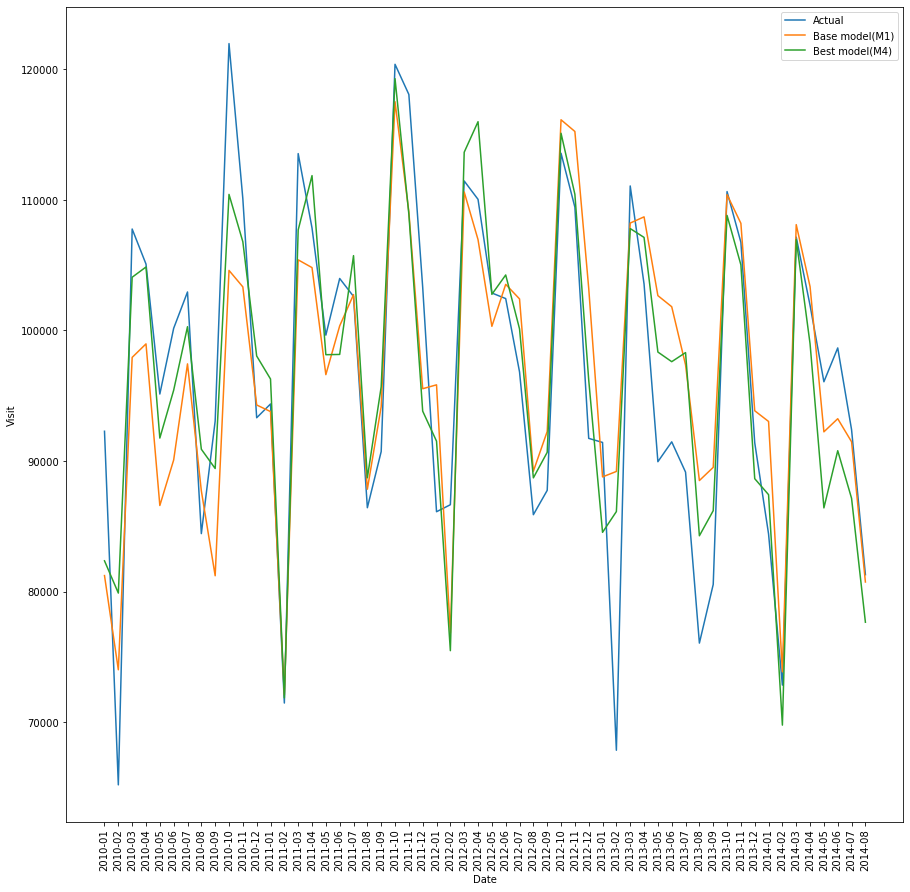

In [14]:
# Set figure size, define x and y lables.

plt.figure(figsize=(15,15))  # figure size
plt.xlabel('Date')
plt.ylabel('Visit')

plt.plot(df.date, df.visit)  # x,y: actual visit
plt.plot(df.date, pred1)  # predicted visit by M1
plt.plot(df.date, pred4)  # predicted visit by M4
plt.legend(['Actual', 'Base model(M1)', 'Best model(M4)'])
plt.xticks(rotation=90)  # Rotate xticks by 90 degree
plt.show()

- `plt.figure(figsize=(15, 15))`: Sets the figure size to 15 inches by 15 inches, specifying the width and height of the plot.
- `plt.xlabel('Date') and plt.ylabel('Visit')`: Set the labels for the x-axis (Date) and y-axis (Visit) on the plot.
- `plt.plot(df.date, df.visit)`: Plots the actual visit data. It uses 'df.date' for the x-axis (dates) and 'df.visit' for the y-axis (actual visit counts).
- `plt.plot(df.date, pred1)`: Similarly, this line plots the predicted visit data from 'M1.' It uses 'df.date' for the x-axis and 'pred1' for the y-axis.
- `plt.plot(df.date, pred4)`: This line plots the predicted visit data from 'M4.' It uses 'df.date' for the x-axis and 'pred4' for the y-axis.
- `plt.legend(['Actual', 'Base model (M1)', 'Best model (M4)'])`: This line adds a legend to the plot, labeling each line with its corresponding information. It specifies that 'Actual' represents the actual visit data, 'Base model (M1)' represents the predicted visit data from 'M1,' and 'Best model (M4)' represents the predicted visit data from 'M4.'
- `plt.xticks(rotation=90)`: This line rotates the x-axis labels by 90 degrees. Rotating the x-axis labels can make them more readable when there are many data points, as it prevents them from overlapping.

- A visual inspection shows that M4 perfomrs better than M1: Predictions by M4 are closer to actual data than those of M1

In [15]:
df1 = pd.read_csv('HK search.csv')
df1.head()

,date,search
0,2009-01,82
1,2009-02,92
2,2009-03,87
3,2009-04,85
4,2009-05,81


In [16]:
# check the data types

df1.dtypes

date      object
search     int64
dtype: object

- `df1.dtypes`: check the data types of each column in the DataFrame df1.
    - year,month,search: numeric(int64)
    - date: string(object)

In [17]:
df1.date.str.split('-')  # split based on '-'

0     [2009, 01]
1     [2009, 02]
2     [2009, 03]
3     [2009, 04]
4     [2009, 05]
         ...    
63    [2014, 04]
64    [2014, 05]
65    [2014, 06]
66    [2014, 07]
67    [2014, 08]
Name: date, Length: 68, dtype: object

- `df1.date.str.split('-')`:  split the values in the 'date' column of the DataFrame df1 based on the hyphen ('-') separator.

In [18]:
df1.date.str.split('-').str[0]  # first string=year

0     2009
1     2009
2     2009
3     2009
4     2009
      ... 
63    2014
64    2014
65    2014
66    2014
67    2014
Name: date, Length: 68, dtype: object

- `df1.date.str.split('-').str[0]`: Splits the values in the 'date' column of the DataFrame df1 based on the hyphen ('-') separator and then extract the first element (index 0: year) from each resulting list.

In [19]:
df1['test']=df1.date.str.split('-').str[0]
df1.dtypes

date      object
search     int64
test      object
dtype: object

- `df1['test'] = df1.date.str.split('-').str[0]`: This line creates a new column 'test' in the DataFrame 'df1'.
    - `df1.date` accesses the 'date' column in the DataFrame.
    - `str.split('-')` splits each entry in the 'date' column based on the hyphen ('-') separator, which separates the year and month in the date string.
    - `str[0]` extracts the first element (index 0) from each split string, which represents the year component. The extracted year values are assigned to the 'test' column.
- `df1.dtypes`: After adding the 'test' column, you check the data types of all columns in the DataFrame 'df1' using the .dtypes attribute.
    - 'test' becomes object(string) after split. Need to change it to a number format to merge with the 'visit data.

In [20]:
df1=df1.drop(['test'], axis=1)  # drop the 'test' column (axis=1)
df1.head()

,date,search
0,2009-01,82
1,2009-02,92
2,2009-03,87
3,2009-04,85
4,2009-05,81


- `df1.drop(['test'], axis=1)`: This line removes the 'test' column from the DataFrame 'df1'.
    - `axis=1` is specified to indicate that you are dropping a column (column-wise operation).